- (c) Ken-ichi Fukui, 2025/04/14
- MIT License

## ロジスティック回帰による手書き文字認識

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml

### MNISTデータの読み込み
- 0〜9の数字の手書き文字（画像）
- 各画像は28x28ピクセル，0〜255の輝度値からなる
- 70,000点のデータセット

In [2]:
# 公開データセットのサイトopenmlからMNISTデータをダウンロード(少々時間が掛かります)
mnist = fetch_openml('mnist_784', version= 1, as_frame= False)

In [3]:
X, y = mnist["data"], mnist["target"]
# データ数，次元数(28x28=784)を確認
X.shape

(70000, 784)

In [4]:
# 学習用に最初の1000点，テスト用に次の1000点のデータを使用
X_train = X[:1000][:]
y_train = y[:1000][:]
X_test = X[1000:2000][:]
y_test = y[1000:2000][:]
print('#data: %d, #feature: %d (training data)' % (X_train.shape[0], X_train.shape[1]))
print('#data: %d, #feature: %d (test data)' % (X_test.shape[0], X_test.shape[1]))

#data: 1000, #feature: 784 (training data)
#data: 1000, #feature: 784 (test data)


### ロジスティック回帰のインスタンスの生成と学習

In [5]:
lr = LogisticRegression(penalty='l2', C=1000.0, random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=1000.0, random_state=0)

### 最初の25サンプルの識別結果をプロット
t: 正解クラス，p: 識別器による推測クラス

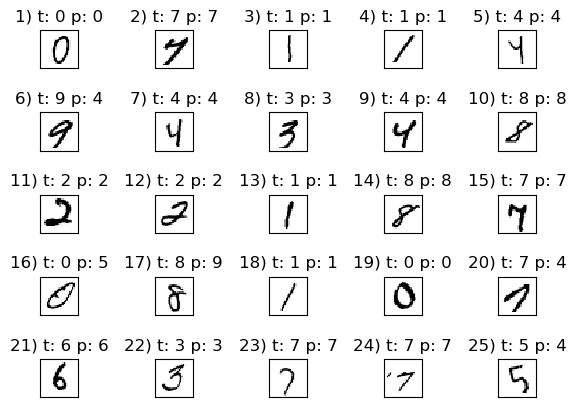

In [8]:
orign_img = X_test[:25]
true_lab = y_test[:25]
y_test_pred = lr.predict(X_test)
predicted_lab = y_test_pred[:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = orign_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %s p: %s' % (i+1, true_lab[i], predicted_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.subplots_adjust(hspace=1.0, wspace=2.0)
plt.show()

### 逆正則化パラメータを変化

In [45]:
params, n_nonzero_weights, accuracy_train, accuracy_test = [],[],[],[]
for c in np.arange(-10, 11, dtype=float):
    lr = LogisticRegression(penalty='l2', C=10**c, random_state=0, solver='liblinear')
    lr.fit(X_train, y_train)
    n_nonzero_weights.append(np.count_nonzero(lr.coef_[1]))
    params.append(10**c)
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    acc_train_temp = np.sum(y_train == y_train_pred, axis=0) *100 / X_train.shape[0]
    acc_test_temp = np.sum(y_test == y_test_pred, axis=0) *100 / X_test.shape[0]
    accuracy_train.append(acc_train_temp)
    accuracy_test.append(acc_test_temp)

### 分類精度のグラフ出力

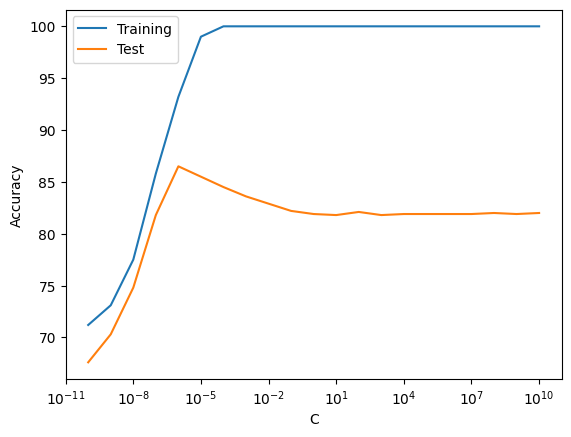

In [46]:
plt.plot(params, accuracy_train,label='Training')
plt.plot(params, accuracy_test, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

### 非ゼロ重みの数のグラフ出力

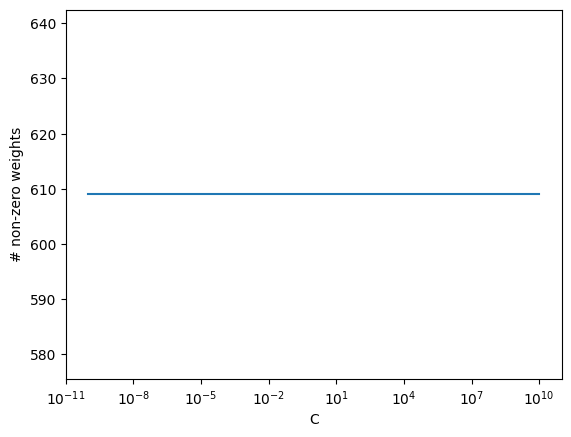

In [47]:
plt.plot(params, n_nonzero_weights)
plt.ylabel('# non-zero weights')
plt.xlabel('C')
plt.xscale('log')
plt.show()